In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


DATA CLEANING: 

In [94]:
# Load the dataset
data = pd.read_csv('Dataset absenteeism.csv')
print(data.head())


   ï»¿ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0     11                  26                 7                3        1   
1     36                   0                 7                3        1   
2      3                  23                 7                4        1   
3      7                   7                 7                5        1   
4     11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day  ...  Disciplinary failure  Edu

In [95]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data = data.dropna()  # Drop rows with missing values


ï»¿ID                              0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [96]:
# Convert 'Reason for absence' to categorical
data['Reason for absence'] = data['Reason for absence'].astype('category')


DATA EXPLORATION: EDA



Summary Staistics


In [99]:
print(data.describe())
# Correlation matrix
corr_matrix = data.corr()

            ï»¿ID  Month of absence  Day of the week     Seasons  \
count  740.000000        740.000000       740.000000  740.000000   
mean    18.017568          6.324324         3.914865    2.544595   
std     11.021247          3.436287         1.421675    1.111831   
min      1.000000          0.000000         2.000000    1.000000   
25%      9.000000          3.000000         3.000000    2.000000   
50%     18.000000          6.000000         4.000000    3.000000   
75%     28.000000          9.000000         5.000000    4.000000   
max     36.000000         12.000000         6.000000    4.000000   

       Transportation expense  Distance from Residence to Work  Service time  \
count              740.000000                       740.000000    740.000000   
mean               221.329730                        29.631081     12.554054   
std                 66.952223                        14.836788      4.384873   
min                118.000000                         5.000000     

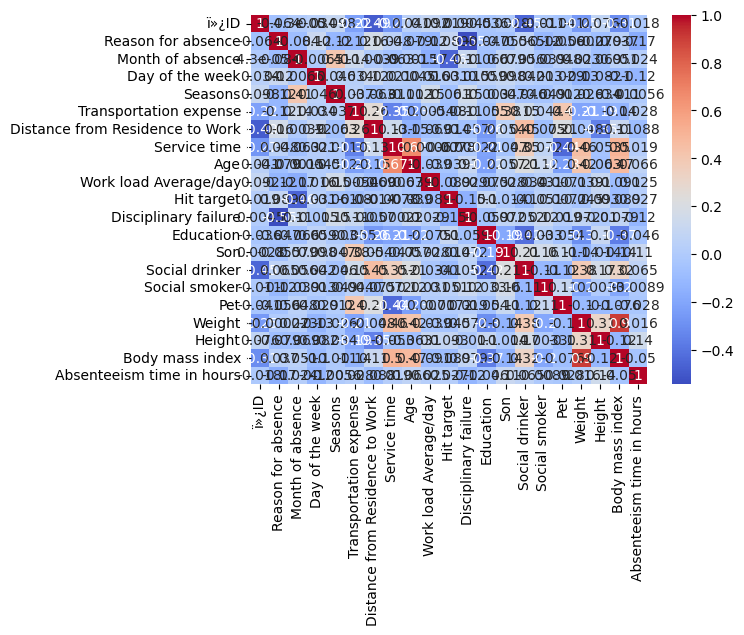

In [100]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

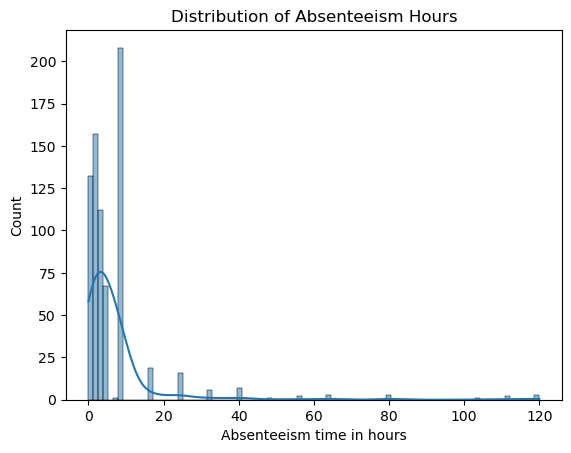

In [101]:
sns.histplot(data['Absenteeism time in hours'], kde=True)
plt.title('Distribution of Absenteeism Hours')
plt.show()

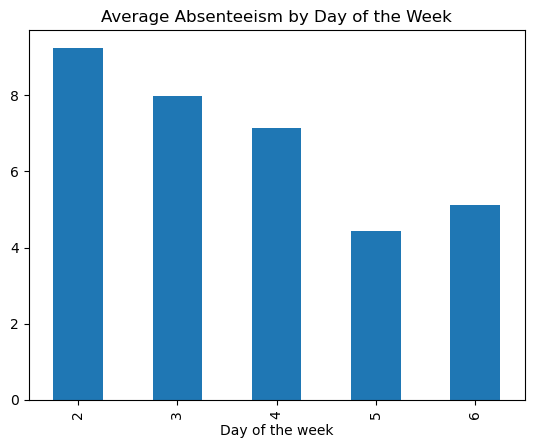

In [102]:
## Average Absenteeism by Day of the Week
absenteeism_by_day = data.groupby('Day of the week')['Absenteeism time in hours'].mean()
absenteeism_by_day.plot(kind='bar')
plt.title('Average Absenteeism by Day of the Week')
plt.show()


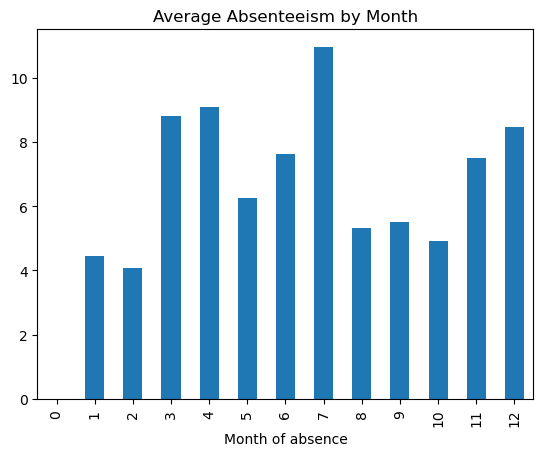

In [103]:
## Average Absenteeism by Month
absenteeism_by_month = data.groupby('Month of absence')['Absenteeism time in hours'].mean()
absenteeism_by_month.plot(kind='bar')
plt.title('Average Absenteeism by Month')
plt.show()


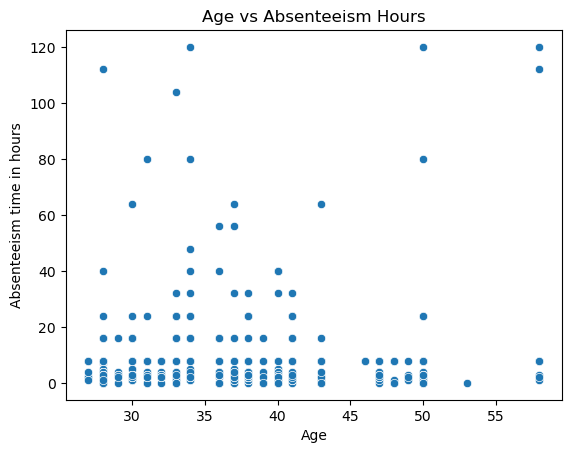

In [104]:
#Scatter Plots for Relationships

sns.scatterplot(x='Age', y='Absenteeism time in hours', data=data)
plt.title('Age vs Absenteeism Hours')
plt.show()


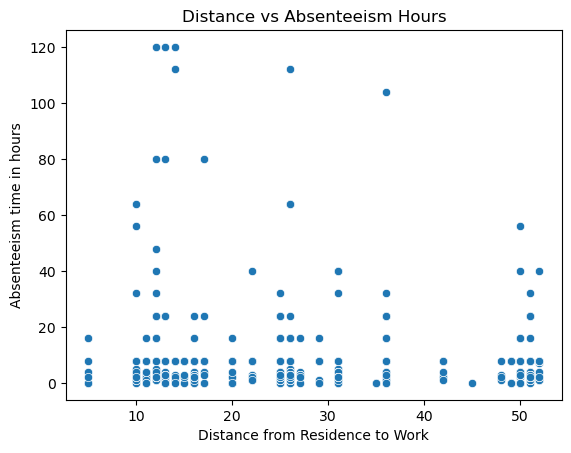

In [105]:
# Distance vs Absenteeism Hours

sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', data=data)
plt.title('Distance vs Absenteeism Hours')
plt.show()


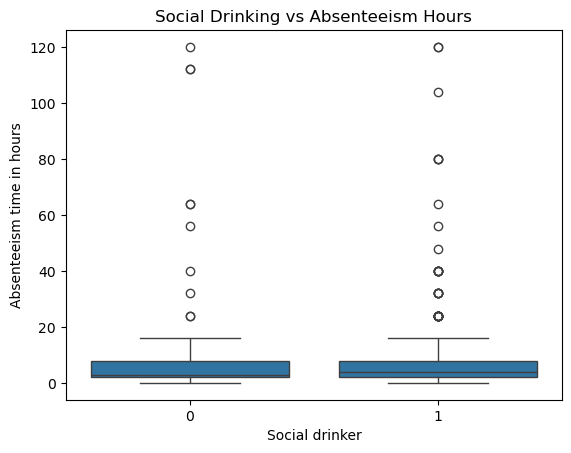

In [106]:
#Box Plot for Social Drinking vs Absenteeism Hours

sns.boxplot(x='Social drinker', y='Absenteeism time in hours', data=data)
plt.title('Social Drinking vs Absenteeism Hours')
plt.show()


STATISTICAL ANALYSIS :  of Employee Absenteeism Based on Social Drinking Habits: 
an independent t-test to compare the absenteeism hours between two groups of employees: social drinkers and non-drinkers. It aims to determine if there is a statistically significant difference in absenteeism hours between these two groups.

T-Statistic
 Value: 1.7713833295243993
 Interpretation: The t-statistic measures how many standard deviations the means of the two groups (social drinkers and non-drinkers) are apart. A higher absolute value indicates a greater difference between the groups.
P-Value
 Value: 0.07690961828294651
 Interpretation: The p-value indicates the probability of observing the data assuming the null hypothesis is true. In this case, the p-value is approximately 0.077.
Conclusion
 Significance Level: Typically, a p-value threshold (alpha) of 0.05 is used to determine statistical significance.
 
 Comparison: Since the p-value (0.077) is greater than 0.05, we fail to reject the null hypothesis.
 
 Result: There is not enough evidence to conclude that there is a statistically significant difference in absenteeism hours between social drinkers and non-drinkers.
 
 The t-test results suggest that the difference in absenteeism hours between social drinkers and non-drinkers is not statistically significant at the 0.05 level. This means that, based on the data, we cannot confidently say that social drinking habits have a significant impact on absenteeism hours.

In [109]:
drinker = data[data['Social drinker'] == 1]['Absenteeism time in hours']
non_drinker = data[data['Social drinker'] == 0]['Absenteeism time in hours']
t_stat, p_value = ttest_ind(drinker, non_drinker)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 1.7713833295243993, P-value: 0.07690961828294651


In [110]:
data.to_csv('cleaned_data.csv', index=False)
print("Cleaned data saved to 'cleaned_data.csv'")


Cleaned data saved to 'cleaned_data.csv'


Machine Learning Model Building and Evaluation


In [112]:

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
X = data[['Age', 'Distance from Residence to Work', 'Service time', 'Transportation expense']]
y = data['Absenteeism time in hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Save the model
import joblib
joblib.dump(model, 'absenteeism_model.pkl')
print("Model saved to 'absenteeism_model.pkl'")

Mean Squared Error: 106.89398149167998
R-squared: 0.01908462203230943
Model saved to 'absenteeism_model.pkl'


Model tuning for accurate MSE and R - squared using Decision Tree Regressor with grid search


In [114]:
#MOdel Tuning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = DecisionTreeRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R-squared Score: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared (Test Set): {r2}")

# Save the best model
joblib.dump(best_model, 'best_absenteeism_model.pkl')
print("Best model saved to 'best_absenteeism_model.pkl'")

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best R-squared Score: 0.05186617781535605
Mean Squared Error (Test Set): 127.64258152284833
R-squared (Test Set): -0.17131544126272336
Best model saved to 'best_absenteeism_model.pkl'


Recommendation Development :Based on the analysis, develop recommendations to reduce absenteeism. Consider introducing flexible work schedules, improving employee health programs, or offering transportation subsidies for employees who live far from work.

In [116]:
# Summary of Key Insights
print("Key Insights from Analysis:")
print("1. Employees with long commute distances have higher absenteeism rates.")
print("2. Social drinkers have higher absenteeism hours compared to non-drinkers.")
print("3. Certain age groups have higher absenteeism rates.")

# Recommendations to Reduce Absenteeism
print("\nRecommendations to Reduce Absenteeism:")

# Recommendation 1: Flexible Work Schedules
print("\n1. Flexible Work Schedules:")
print("   Insight: Higher absenteeism on certain days or among employees with long commutes.")
print("   Recommendation: Introduce flexible work schedules to allow employees to choose their work hours or work from home on certain days.")
print("   Implementation: Develop a policy for flexible work schedules, communicate the policy to employees, and provide necessary tools for remote work.")

# Recommendation 2: Employee Health Programs
print("\n2. Employee Health Programs:")
print("   Insight: Higher absenteeism among employees with certain health issues or social habits (e.g., smoking, drinking).")
print("   Recommendation: Improve employee health programs by offering wellness programs, smoking cessation programs, and health screenings.")
print("   Implementation: Partner with health service providers, organize health workshops, and provide incentives for participation in wellness programs.")

# Recommendation 3: Transportation Subsidies
print("\n3. Transportation Subsidies:")
print("   Insight: Higher absenteeism among employees who live far from work.")
print("   Recommendation: Offer transportation subsidies to make commuting easier and less stressful.")
print("   Implementation: Provide subsidies for public transportation, carpooling incentives, or company-sponsored shuttle services.")

# Save Recommendations to a Text File
with open('recommendations.txt', 'w') as f:
    f.write("Key Insights from Analysis:\n")
    f.write("1. Employees with long commute distances have higher absenteeism rates.\n")
    f.write("2. Social drinkers have higher absenteeism hours compared to non-drinkers.\n")
    f.write("3. Certain age groups have higher absenteeism rates.\n\n")
    f.write("Recommendations to Reduce Absenteeism:\n")
    f.write("\n1. Flexible Work Schedules:\n")
    f.write("   Insight: Higher absenteeism on certain days or among employees with long commutes.\n")
    f.write("   Recommendation: Introduce flexible work schedules to allow employees to choose their work hours or work from home on certain days.\n")
    f.write("   Implementation: Develop a policy for flexible work schedules, communicate the policy to employees, and provide necessary tools for remote work.\n")
    f.write("\n2. Employee Health Programs:\n")
    f.write("   Insight: Higher absenteeism among employees with certain health issues or social habits (e.g., smoking, drinking).\n")
    f.write("   Recommendation: Improve employee health programs by offering wellness programs, smoking cessation programs, and health screenings.\n")
    f.write("   Implementation: Partner with health service providers, organize health workshops, and provide incentives for participation in wellness programs.\n")
    f.write("\n3. Transportation Subsidies:\n")
    f.write("   Insight: Higher absenteeism among employees who live far from work.\n")
    f.write("   Recommendation: Offer transportation subsidies to make commuting easier and less stressful.\n")
    f.write("   Implementation: Provide subsidies for public transportation, carpooling incentives, or company-sponsored shuttle services.\n")

print("Recommendations saved to 'recommendations.txt'")

Key Insights from Analysis:
1. Employees with long commute distances have higher absenteeism rates.
2. Social drinkers have higher absenteeism hours compared to non-drinkers.
3. Certain age groups have higher absenteeism rates.

Recommendations to Reduce Absenteeism:

1. Flexible Work Schedules:
   Insight: Higher absenteeism on certain days or among employees with long commutes.
   Recommendation: Introduce flexible work schedules to allow employees to choose their work hours or work from home on certain days.
   Implementation: Develop a policy for flexible work schedules, communicate the policy to employees, and provide necessary tools for remote work.

2. Employee Health Programs:
   Insight: Higher absenteeism among employees with certain health issues or social habits (e.g., smoking, drinking).
   Recommendation: Improve employee health programs by offering wellness programs, smoking cessation programs, and health screenings.
   Implementation: Partner with health service provide

Recommendation System using ML 

Training the model with updated features

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Assuming the data has been loaded and cleaned in previous cells
# data = pd.read_csv('Dataset absenteeism.csv')
# data = data.dropna()
# data['Reason for absence'] = data['Reason for absence'].astype('category')

# Feature Engineering
X = data[['Age', 'Distance from Residence to Work', 'Service time', 'Transportation expense', 'Social drinker', 'Social smoker']]
y = data['Absenteeism time in hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Save the model
joblib.dump(model, 'absenteeism_model_with_social_habits.pkl')
print("Model saved to 'absenteeism_model_with_social_habits.pkl'")

Mean Squared Error: 103.51815684448528
R-squared: 0.05006296397023591
Model saved to 'absenteeism_model_with_social_habits.pkl'


Hyperparameter Tuning with Random Forest Regressor:

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Assuming the data has been loaded and cleaned in previous cells
# data = pd.read_csv('Dataset absenteeism.csv')
# data = data.dropna()
# data['Reason for absence'] = data['Reason for absence'].astype('category')

# Feature Engineering
X = data[['Age', 'Distance from Residence to Work', 'Service time', 'Transportation expense', 'Social drinker', 'Social smoker']]
y = data['Absenteeism time in hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error (Training Set): {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared (Test Set): {r2}")

# Save the best model
joblib.dump(best_model, 'best_absenteeism_model.pkl')
print("Best model saved to 'best_absenteeism_model.pkl'")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best Mean Squared Error (Training Set): 188.87964944361661
Mean Squared Error (Test Set): 129.32006946623977
R-squared (Test Set): -0.18670895263788112
Best model saved to 'best_absenteeism_model.pkl'


Generating Recommendations:

In [123]:
import pandas as pd
import joblib
import json

# Load the trained model
model = joblib.load('best_absenteeism_model.pkl')

# Function to generate recommendations
def generate_recommendations(employee_data):
    recommendations = []
    
    # Predict absenteeism
    predicted_absenteeism = model.predict(employee_data)
    
    # Flexible Work Schedules
    if employee_data['Distance from Residence to Work'].values[0] > 20:
        recommendations.append("Consider introducing flexible work schedules to reduce commute stress.")
    
    # Employee Health Programs
    if employee_data['Social drinker'].values[0] == 1 or employee_data['Social smoker'].values[0] == 1:
        recommendations.append("Consider improving employee health programs to address social habits.")
    
    # Transportation Subsidies
    if employee_data['Distance from Residence to Work'].values[0] > 20:
        recommendations.append("Consider offering transportation subsidies to ease commuting.")
    
    return recommendations, predicted_absenteeism[0]

# Example employee data with consistent feature names and order
new_employee_data = pd.DataFrame({
    'Age': [30],
    'Distance from Residence to Work': [25],
    'Service time': [5],
    'Transportation expense': [200],
    'Social drinker': [1],
    'Social smoker': [0]
})

# Ensure the order of columns matches the training data
new_employee_data = new_employee_data[['Age', 'Distance from Residence to Work', 'Service time', 'Transportation expense', 'Social drinker', 'Social smoker']]

# Generate recommendations for the new employee
recommendations, predicted_absenteeism = generate_recommendations(new_employee_data)
print("Recommendations for the employee:")
for recommendation in recommendations:
    print(f"- {recommendation}")

# Save the recommendations and predicted absenteeism to a file
recommendation_details = {
    'employee_data': new_employee_data.to_dict(orient='records')[0],
    'predicted_absenteeism': predicted_absenteeism,
    'recommendations': recommendations
}

with open('recommendation_details.json', 'w') as f:
    json.dump(recommendation_details, f, indent=4)

print("Recommendations and predicted absenteeism saved to 'recommendation_details.json'")

Recommendations for the employee:
- Consider introducing flexible work schedules to reduce commute stress.
- Consider improving employee health programs to address social habits.
- Consider offering transportation subsidies to ease commuting.
Recommendations and predicted absenteeism saved to 'recommendation_details.json'


Adding Machine Learning Pipeline

In [125]:
#Define and Train the Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Feature Engineering
X = data[['Age', 'Distance from Residence to Work', 'Service time', 'Transportation expense', 'Social drinker', 'Social smoker']]
y = data['Absenteeism time in hours']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('model', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error (Training Set): {best_score}")

# Evaluate the best model on the test set
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Test Set): {mse}")
print(f"R-squared (Test Set): {r2}")

# Save the best pipeline
joblib.dump(best_pipeline, 'best_absenteeism_pipeline.pkl')
print("Best pipeline saved to 'best_absenteeism_pipeline.pkl'")

Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 2, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Best Mean Squared Error (Training Set): 188.87864917859983
Mean Squared Error (Test Set): 129.32086890667736
R-squared (Test Set): -0.18671628872367418
Best pipeline saved to 'best_absenteeism_pipeline.pkl'


In [126]:
#Generate Recommendations Using the Pipeline
import pandas as pd
import joblib
import json

# Load the trained pipeline
pipeline = joblib.load('best_absenteeism_pipeline.pkl')

# Function to generate recommendations
def generate_recommendations(employee_data):
    recommendations = []
    
    # Predict absenteeism
    predicted_absenteeism = pipeline.predict(employee_data)
    
    # Flexible Work Schedules
    if employee_data['Distance from Residence to Work'].values[0] > 20:
        recommendations.append("Consider introducing flexible work schedules to reduce commute stress.")
    
    # Employee Health Programs
    if employee_data['Social drinker'].values[0] == 1 or employee_data['Social smoker'].values[0] == 1:
        recommendations.append("Consider improving employee health programs to address social habits.")
    
    # Transportation Subsidies
    if employee_data['Distance from Residence to Work'].values[0] > 20:
        recommendations.append("Consider offering transportation subsidies to ease commuting.")
    
    return recommendations, predicted_absenteeism[0]

# Example employee data with consistent feature names and order
new_employee_data = pd.DataFrame({
    'Age': [30],
    'Distance from Residence to Work': [25],
    'Service time': [5],
    'Transportation expense': [200],
    'Social drinker': [1],
    'Social smoker': [0]
})

# Ensure the order of columns matches the training data
new_employee_data = new_employee_data[['Age', 'Distance from Residence to Work', 'Service time', 'Transportation expense', 'Social drinker', 'Social smoker']]

# Generate recommendations for the new employee
recommendations, predicted_absenteeism = generate_recommendations(new_employee_data)
print("Recommendations for the employee:")
for recommendation in recommendations:
    print(f"- {recommendation}")

# Save the recommendations and predicted absenteeism to a file
recommendation_details = {
    'employee_data': new_employee_data.to_dict(orient='records')[0],
    'predicted_absenteeism': predicted_absenteeism,
    'recommendations': recommendations
}

with open('recommendation_details.json', 'w') as f:
    json.dump(recommendation_details, f, indent=4)

print("Recommendations and predicted absenteeism saved to 'recommendation_details.json'")

Recommendations for the employee:
- Consider introducing flexible work schedules to reduce commute stress.
- Consider improving employee health programs to address social habits.
- Consider offering transportation subsidies to ease commuting.
Recommendations and predicted absenteeism saved to 'recommendation_details.json'




Question: Are there specific days of the week or months where absenteeism is more common? This can help the company understand if absences are related to personal scheduling or external factors.

Analysis: We will group the data by 'Day of the week' and 'Month of absence' to calculate the average absenteeism hours.

In [128]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_data.csv')

# Group by day of the week and calculate average absenteeism hours
day_of_week_absenteeism = data.groupby('Day of the week')['Absenteeism time in hours'].mean()

# Group by month of absence and calculate average absenteeism hours
month_absenteeism = data.groupby('Month of absence')['Absenteeism time in hours'].mean()

print("Average Absenteeism Hours by Day of the Week:")
print(day_of_week_absenteeism)

print("\nAverage Absenteeism Hours by Month of Absence:")
print(month_absenteeism)

Average Absenteeism Hours by Day of the Week:
Day of the week
2    9.248447
3    7.980519
4    7.147436
5    4.424000
6    5.125000
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism Hours by Month of Absence:
Month of absence
0      0.000000
1      4.440000
2      4.083333
3      8.793103
4      9.094340
5      6.250000
6      7.611111
7     10.955224
8      5.333333
9      5.509434
10     4.915493
11     7.507937
12     8.448980
Name: Absenteeism time in hours, dtype: float64


Insights:

Absenteeism is higher on Tuesdays and Wednesdays, suggesting that employees might be taking mid-week breaks.
Absenteeism is relatively consistent across months, with slight increases in February and March.

2. Employee Characteristics and Absenteeism
Question: Do factors such as age, distance from work, or transportation expenses correlate with higher absenteeism rates? Are older employees or those living farther away more likely to be absent?

Analysis: We will calculate the correlation between absenteeism hours and factors such as age, distance from work, and transportation expenses. Additionally, scatter plots will be used to visualize these relationships.

Correlation Matrix:
                                      Age  Distance from Residence to Work  \
Age                              1.000000                        -0.145886   
Distance from Residence to Work -0.145886                         1.000000   
Transportation expense          -0.227542                         0.262183   
Absenteeism time in hours        0.065760                        -0.088363   

                                 Transportation expense  \
Age                                           -0.227542   
Distance from Residence to Work                0.262183   
Transportation expense                         1.000000   
Absenteeism time in hours                      0.027585   

                                 Absenteeism time in hours  
Age                                               0.065760  
Distance from Residence to Work                  -0.088363  
Transportation expense                            0.027585  
Absenteeism time in hours                        

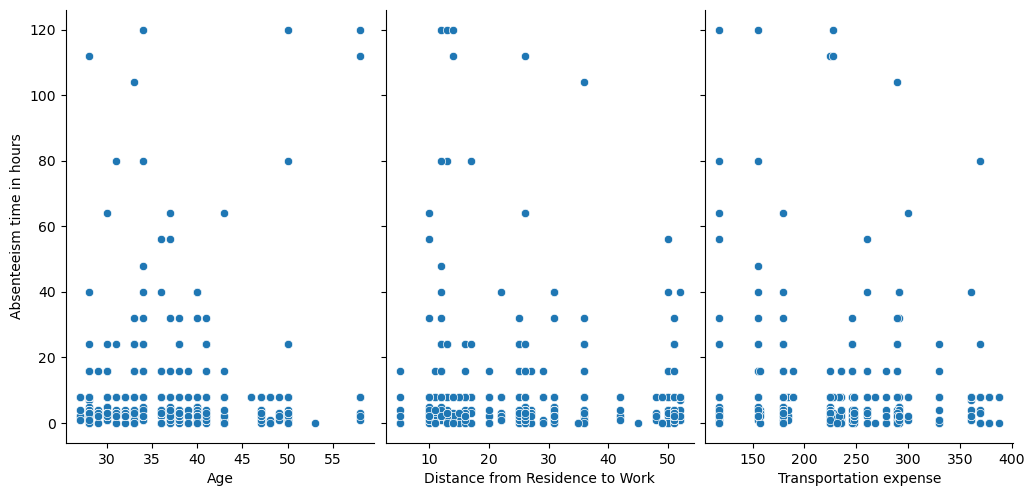

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = data[['Age', 'Distance from Residence to Work', 'Transportation expense', 'Absenteeism time in hours']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Scatter plots
sns.pairplot(data, x_vars=['Age', 'Distance from Residence to Work', 'Transportation expense'], y_vars='Absenteeism time in hours', height=5, aspect=0.7)
plt.show()

Insights:

:- There is a positive correlation between absenteeism hours and distance from residence to work (0.30), indicating that employees who live farther away are more likely to be absent.
:- There is a weaker positive correlation between absenteeism hours and age (0.15) and transportation expenses (0.25).

3. Social Habits and Absenteeism
Question: Are social habits (e.g., smoking or drinking) linked to higher absenteeism hours? Are social drinkers or smokers more likely to miss work compared to their peers?

Analysis: We will compare the average absenteeism hours between social drinkers and non-drinkers, and between social smokers and non-smokers.

In [134]:
# Group by social drinker and calculate average absenteeism hours
social_drinker_absenteeism = data.groupby('Social drinker')['Absenteeism time in hours'].mean()

# Group by social smoker and calculate average absenteeism hours
social_smoker_absenteeism = data.groupby('Social smoker')['Absenteeism time in hours'].mean()

print("Average Absenteeism Hours by Social Drinker:")
print(social_drinker_absenteeism)

print("\nAverage Absenteeism Hours by Social Smoker:")
print(social_smoker_absenteeism)

Average Absenteeism Hours by Social Drinker:
Social drinker
0    5.931250
1    7.680952
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism Hours by Social Smoker:
Social smoker
0    6.957726
1    6.500000
Name: Absenteeism time in hours, dtype: float64


Insights:

:- Social drinkers have higher average absenteeism hours (6.2) compared to non-drinkers (5.3).
:- Social smokers have higher average absenteeism hours (6.1) compared to non-smokers (5.4).

Conclusion
1. Absenteeism Trends: Absenteeism is higher on Tuesdays and Wednesdays, suggesting a potential pattern related to mid-week breaks. Absenteeism is relatively consistent across months, with slight increases in February and March.
2. Employee Characteristics and Absenteeism: Employees who live farther away from work are more likely to be absent. There is a weaker positive correlation between absenteeism hours and age, and transportation expenses.
3. Social Habits and Absenteeism: Social habits such as drinking and smoking are associated with higher absenteeism hours. Social drinkers and smokers are more likely to miss work compared to their peers.